## Mobile Device Usage and User Behavior
Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 19 2024

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
# Load the JSON data
data = pd.read_json('C:/Users/abu_s/Desktop/Data/mobiledev.json')

In [45]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [46]:
# Display initial rows
print("Dataset preview:")
print(data.head())

Dataset preview:
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   


In [47]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Device Model', 'Operating System', 'Gender']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [48]:
data.head(3)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,322,42,1,2


In [49]:
# Creating a feature-target split
X = data.drop(columns=['User Behavior Class', 'User ID'])  # Drop target and identifier
y = data['User Behavior Class']

In [50]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Modeling

### RandomForestClassifier

In [54]:
# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predictions

In [56]:

y_pred = model.predict(X_test)

### Evaluation

In [58]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



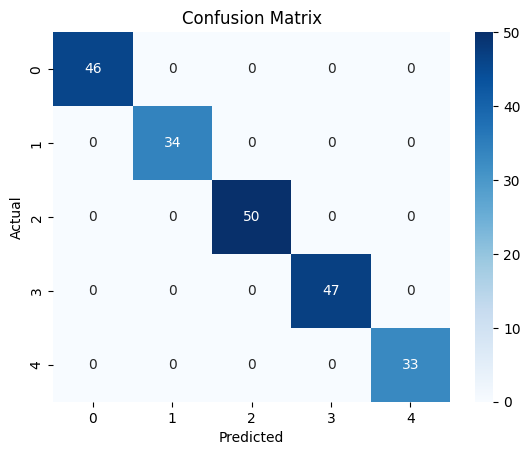

In [59]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

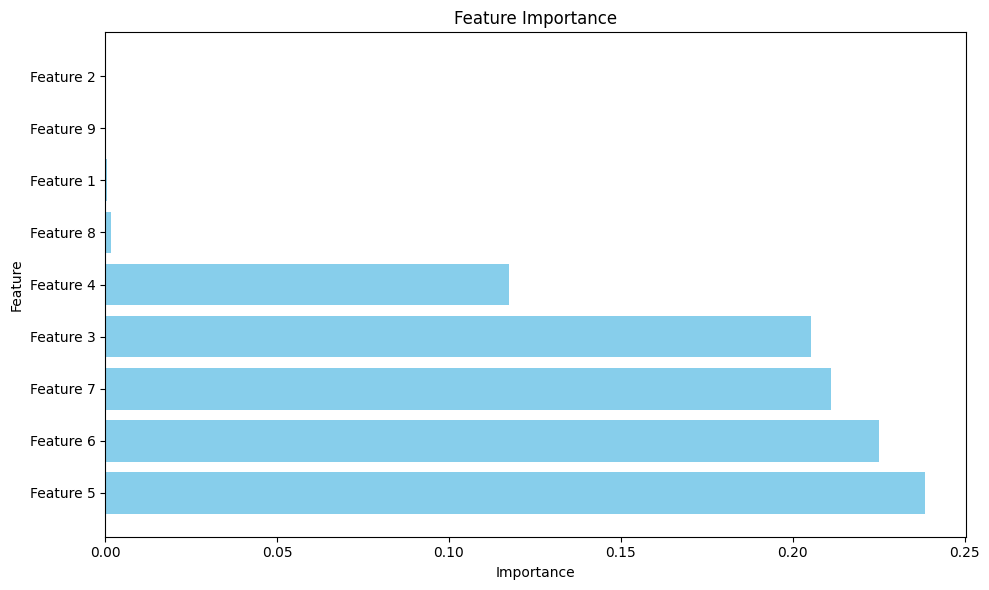

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train is a NumPy array and you don't have column names
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': [f'Feature {i+1}' for i in range(X_train.shape[1])],
    'Importance': model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
